# Основы машинного обучения: лабораторная работа №1
## Задание 3. Знакомство с Pandas

В этом задании необходимо научиться базовым приемам работы с данными. Необходимо загрузить заданный по варианту датасет, провести разведочный анализ данных, сформулировать гипотезы о возможном значении всех полей в датасете, проверить эти гипотезы, и ответить на вопросы по данным. <!-- Если в конкретном задании не указано иное, проводить очистку данных (удаление пустых и невалидных значений) не нужно. -->

### Цель

Знакомство с разведочным анализом данных и применение Pandas для извлечения информации

### Оценивание и баллы

За это задание в общей сложности можно получить до 7 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Важные замечания

1. *Откройте этот файл в своем репозитории на GitHub и скопируйте адрес из адресной строки браузера. Перейдтие в [Google Colab](https://colab.research.google.com/), выберите `Файл -> Открыть ноутбук -> GitHub`, вставьте скопированный URL и нажмите кнопку поиска (кнопка с лупой справа от поля ввода строки для поиска). В Google Colab откроется копия этого ноутбука из персонального репозитория на GitHub.*
2. *Не удаляйте и не изменяйте имена переменных в ячейках с кодом ниже. Можно добавлять в каждую ячейку произвольное количество строк кода, главное - сохранить результат решения задачи в предопределенную (-ые) переменную (-ые) в соответствующей ячейке. Если этого не сделать, автоматические тесты не будут пройдены.*
3. *Чтобы сохранить работу, выбрите `Файл -> Сохранить копию на GitHub` и __вручную выберите правильный репозиторий из раскрывающегося списка__.*
4. *Если в процессе выполнения задания этот файл окажется испорчен, ознакомьтесь с инструкцией в ноутбуке [jupyter_assignment](jupyter_assignment.ipynb), раздел "Повторная сдача".*  


#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [1]:
### BEGIN YOUR CODE

Student_ID = 10

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [2]:
datasets = [('Chipotle','https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'), ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'), ('Open Food Facts', 'https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2')]

dataset_id = None if Student_ID is None else Student_ID % 3
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")
    print(f"В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № {dataset_id+1}")

Датасет 'US Air Carrier market in 2019' доступен по следующей ссылке: https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № 2


Скачайте датасет с помощью команды `!wget <dataset_url>`, где `<dataset_url>` необходимо заменить на ссылку на датасет, появившуюся после выполнения предыдущей ячейки. При необходимости разархивируйте датасет, используя команды `!unzip`, `!tar` и др.

*Примечание: в Jupyter-ноутбуке можно использовать любые команды командного интерпретатора bash. Для этого необходимо поставить в ячейке с кодом восклицательный знак `!`, после которого записать команду bash со всеми необходимыми аргументами. Результат выполнения этой команды bash будет возвращен в Jupyter и его можно использовать в коде на Python.*

In [3]:
### BEGIN YOUR CODE

!wget https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip

!unzip aircarrier_market_us_2019.zip

# !tar ...
# !gunzip ...

### END YOUR CODE

--2024-12-01 09:38:43--  https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10159563 (9.7M) [application/zip]
Saving to: ‘aircarrier_market_us_2019.zip’

aircarrier_market_u 100%[===================>]   9.69M  63.1MB/s    in 0.2s    

2024-12-01 09:38:44 (63.1 MB/s) - ‘aircarrier_market_us_2019.zip’ saved [10159563/10159563]

Archive:  aircarrier_market_us_2019.zip
  inflating: aircarrier_market_us_2019.csv  


##### 2. Загрузите датасет в pandas.DataFrame, сохраните его в переменной `df`. Cконвертируйте названия столбцов в нижний регистр

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Place your code to read the dataset here. Don't forget to import all the libraries you need!
# path to dataset
file_path = 'aircarrier_market_us_2019.csv'

# Open for read
df = pd.read_csv(file_path)

# Lower name column
df.columns = df.columns.str.lower()


##### 3. Какие столбцы присутствуют в наборе данных? (0.25 балла)

In [ ]:
columns = df.columns # Place your code here instead of '...'

print(columns)

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'airline_id', 'unique_carrier_name', 'unique_carrier_entity', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_fips',
       'origin_state_nm', 'origin_country', 'origin_country_name',
       'origin_wac', 'dest_airport_id', 'dest_airport_seq_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_fips', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'dest_wac', 'year', 'quarter', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')


##### 4. Ответьте на вопрос и сохраните ответ в переменной `answer1` (0.25 балла)

Вопросы:
1. Какое блюдо (`item_name`) заказывали чаще всего?
2. Сколько авиаперевозчиков (`carrier`) представлены в датасете?
3. По скольки продуктам в датасете имеется информация о содержании аллергенов (`allergens`)?

In [ ]:
answer1 = df['carrier'].nunique() # Place your code here instead of '...'

print(answer1)

319


##### 5. Ответьте на вопрос и сохраните ответ в переменной `answer2` (0.5 балла)

Вопросы:
1. Сколько всего было заказов блюда, название которого сохранено в `answer1`?
2. Посчитайте общие суммарные количества перевезенных пассажиров (`passangers`), фунтов груза (`freight`) и почты (`mail`) на маршруте из Великобритании (UK) в США (US). В `answer2` запишите максимальное из трех получившихся чисел.
3. Сколько всего продуктов, относящихся к категории "молочные" (`Dairies,Milks`), с заполненным названием?

In [ ]:
filtered_df = df[(df['origin_country'] == 'GB') & (df['dest_country'] == 'US')]
passangers = filtered_df['passengers'].sum()
freight = filtered_df['freight'].sum()
mail = filtered_df['mail'].sum()
answer2 = max(passangers, freight, mail) # Place your code here instead of '...'

print(answer2)

903296879.0


##### 6. Ответьте на вопрос и сохраните ответ в переменной `answer3` (0.5 балла)

Вопросы:
1. Какой доход получила сеть Chipotle Mexican Grill на заказах, попавших в датасет?
2. Какой авиаперевозчик (`unique_carrier_name`) перевез больше всего груза (`mail` + `freight`)?
3. Как называется продукт категории `Fats` с максимальной жирностью, не превышающей 30 г на 100 г продукта?

In [14]:
df['total_cargo'] = df['mail'] + df['freight']
grouped = df.groupby('unique_carrier_name')['total_cargo'].sum()
answer3 = grouped.idxmax() # Place your code here instead of '...'

print(answer3)

Federal Express Corporation


##### 7. Ответьте на вопрос и сохраните ответ в переменной `answer4` (0.5 балла)

Вопросы:
1. Каков средний доход с одного заказа?
2. Какое максимальное количество пассажиров одна авиакомпания смогла перевезти из США в другие страны за все время?
3. Какова энергетическая ценность в кДж продукта из России (`category_en`) имеющего максимальное содержание холистерина?

In [ ]:
filtered_df = df[(df['origin_country'] == 'US') & (df['dest_country'] != 'US')]
grouped = filtered_df.groupby('carrier')['passengers'].sum()
answer4 = grouped.max() # Place your code here instead of '...'

print(answer4)

14867653.0


##### 8. Ответьте на вопрос и сохраните ответ в переменной `answer5` (1 балл)

Вопросы:
1. Сколько раз был заказан самый популярный напиток (Coke, Sprite, Mountain Dew и т.п.)?
2. Между какими двумя городами было перевезено наибольшее количество пассажиров? Учтите оба направления. Ответ запишите в виде списка из двух строк.
3. Привести названия всех аллергенов к нижнему регистру. Какой аллерген встречается в продуктах чаще всего?

In [15]:
df['route'] = df.apply(lambda row: tuple(sorted([row['origin_city_name'], row['dest_city_name']])), axis=1)
grouped = df.groupby('route')['passengers'].sum()

answer5 = grouped.idxmax() # Place your code here instead of '...'

print(answer5)

TypeError: unhashable type: 'list'

##### 9. Ответьте на вопрос и сохраните ответ в переменной `answer6` (1 балл)

Вопросы:
1. Какой суммарный доход принесли напитки в заказах вегетарианцев?
2. Для пары городов из предыдущего вопроса найдите 3 авиакомпании, которые перевезли больше всего пассажиров. Посчитайте, какой процент от общего пассажиропотока между этими городами перевезла каждая из трех авиакомпаний. В `answer6` запишите найденные проценты в виде списка из трех чисел, округлив их до двух знаков после запятой.
3. Найти самый опасный продукт, содержащий наибольшее количество аллергенов.

In [ ]:
df['route'] = df.apply(lambda row: tuple(sorted([row['origin_city_name'], row['dest_city_name']])), axis=1)
max_route = df['route'].value_counts().idxmax()
filtered_df = df[df['route'] == max_route]
airline_grouped = filtered_df.groupby('route')['passengers'].sum()
total_passengers = airline_grouped.sum()
top_airlines = airline_grouped.nlargest(3)
answer6 = (top_airlines / total_passengers * 100).round(2).tolist() # Place your code here instead of '...'

print(answer6)

[100.0]


##### 10. Ответьте на вопрос и сохраните ответ в переменной `answer7` (1 балл)

Вопросы:
1. Сколько было сделано вегетарианских заказов? Заказ не считается вегетарианским, если в нем были не вегетарианские блюда.
2. Для каждой страны найдите процент международного пассажиропотока (относительно США), используя общее количество пассажиров на рейсах класса F. В `answer7` запишите название страны с третьим по величине пассажиропотоком в/из США.
3. Переведите названия групп продуктов (`pnns_groups_1`, `pnns_groups_2`) в нижний регистр. В переменную `answer7` запишите список, содержащий три элемента: название группы продуктов 1, название группы продуктов 2 и среднее количество пищевых волокон (`fiber`) для седьмой по насыщенности пищевыми волокнами группы продуктов.

In [ ]:
f_class_data = df[df['class'] == 'F']
origin_counts = f_class_data.groupby('origin_country')['passengers'].sum()
dest_counts = f_class_data.groupby('dest_country')['passengers'].sum()
total_counts = origin_counts.add(dest_counts, fill_value=0)
us_passengers = total_counts.get('US', 0)
percentage = (total_counts / us_passengers) * 100
sorted_countries = percentage.sort_values(ascending=False)
answer7 = sorted_countries.index[2] # Place your code here instead of '...'

print(answer7)

MX


##### 11. Ответьте на вопрос и сохраните ответ в переменной `answer8` (1 балл)

Вопросы:
1. Какой соус или дополнительный ингредиент по выбору (`choice_description`) чаще всего берут вместе с бурито с курицей (Chicken Burrito)?
2. В каком месяце пассажиропоток между городами, записанными в переменную `answer5`, был максимальным?
3. Какое название у группы продуктов `pnns_groups_2`, явояющейся наиболее сбалансированной с точки зрения среднего содержания калорий, жиров и углеводов? Под "сбалансированной" понимать близость БЖУ к пропорции 1:1:4.

In [ ]:
filtered_data = df[(df['origin_city_name'] == answer5[0]) & (df['dest_city_name'] == answer5[1])]
monthly_passengers = filtered_data.groupby(['month'])['passengers'].sum().reset_index()
max_passengers_row = monthly_passengers.loc[monthly_passengers['passengers'].idxmax()]

answer8 = max_passengers_row['month'] # Place your code here instead of '...'

print(answer8)

5.0


##### 12. Визуализируйте данные в соответствии с заданием (1 балл)

1. Построить гистограмму распределения общей стоимости заказов. Найти и отметить на графике средний чек и медианную стоимость заказа.
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
3. Построить столбчатую гистограмму усредненной по группам продуктов энергетической ценности, с группировкой по `pnns_groups_1`.


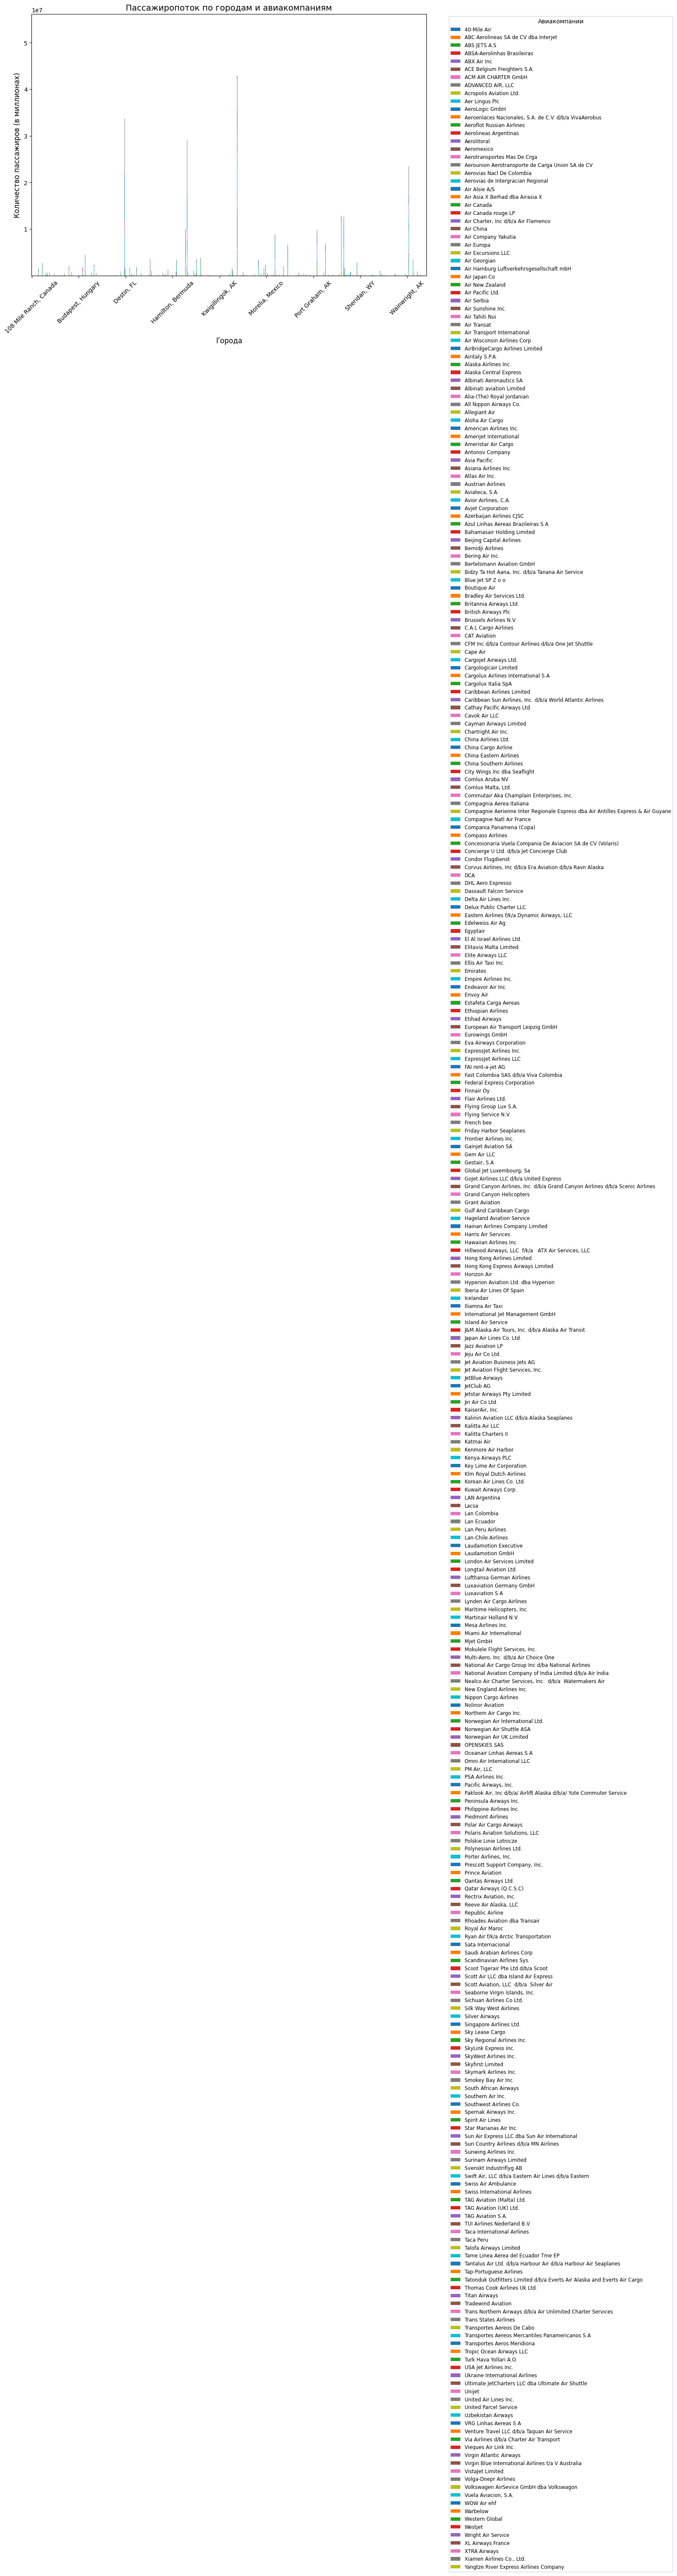

In [ ]:
grouped_data = df.groupby(['origin_city_name', 'carrier_name'])['passengers'].sum().unstack(fill_value=0)

# Построение стековой столбчатой гистограммы
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Настройка графика
plt.title('Пассажиропоток по городам и авиакомпаниям', fontsize=14)
plt.xlabel('Города', fontsize=12)
plt.ylabel('Количество пассажиров (в миллионах)', fontsize=12)

# Скрыть накладывающиеся значения на оси X
ax = plt.gca()  # Получаем текущую ось
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Оставляем только целые значения

# Настройка легенды
plt.legend(title='Авиакомпании', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.xticks(rotation=45)

# Показать график
plt.show()